In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = df.drop("target", axis=1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler((-1, 1))

In [10]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import torch
from torch import nn, optim
from torch.nn import functional as F

In [12]:
X_train.shape

(227, 13)

In [13]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [14]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(13, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [15]:
net = HeartDiseaseNN()

In [16]:
optimizer = optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()

In [17]:
losses = []

In [18]:
for epoch in range(1, 201):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print("Epoch {}, Loss: {}".format(epoch, loss.item()))

Epoch 1, Loss: 0.6903858780860901
Epoch 2, Loss: 0.6774693727493286
Epoch 3, Loss: 0.6654196977615356
Epoch 4, Loss: 0.6540058851242065
Epoch 5, Loss: 0.6429582238197327
Epoch 6, Loss: 0.632128119468689
Epoch 7, Loss: 0.6213775277137756
Epoch 8, Loss: 0.610590398311615
Epoch 9, Loss: 0.5996828079223633
Epoch 10, Loss: 0.5886480808258057
Epoch 11, Loss: 0.5775065422058105
Epoch 12, Loss: 0.5662845373153687
Epoch 13, Loss: 0.5548694729804993
Epoch 14, Loss: 0.5432387590408325
Epoch 15, Loss: 0.5315544009208679
Epoch 16, Loss: 0.5199609398841858
Epoch 17, Loss: 0.5084003210067749
Epoch 18, Loss: 0.49697190523147583
Epoch 19, Loss: 0.4857673943042755
Epoch 20, Loss: 0.4748818278312683
Epoch 21, Loss: 0.46439555287361145
Epoch 22, Loss: 0.454364538192749
Epoch 23, Loss: 0.44480663537979126
Epoch 24, Loss: 0.4357711374759674
Epoch 25, Loss: 0.42728930711746216
Epoch 26, Loss: 0.41935858130455017
Epoch 27, Loss: 0.4119761884212494
Epoch 28, Loss: 0.40507882833480835
Epoch 29, Loss: 0.39861720

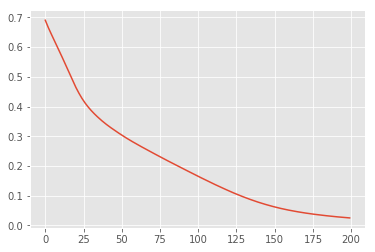

In [19]:
plt.plot(losses)

In [20]:
pred_test = net(X_test)
_, preds_y = torch.max(pred_test, 1)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
accuracy_score(y_test, preds_y)

0.7763157894736842